In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import pickle
import os
import torch.nn as nn
from tqdm import tqdm
import torch.nn.functional as F

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
%matplotlib inline

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/jhmoon/venvFL/env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('../Data/mHealth/mhealth_raw_data.pickle', 'rb') as f:
    df = pickle.load(f)

In [239]:
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [240]:
def num(df):
    if df == 'subject1':
        return 1
    elif df == 'subject2':
        return 2
    elif df == 'subject3':
        return 3
    elif df == 'subject4':
        return 4
    elif df == 'subject5':
        return 5
    elif df == 'subject6':
        return 6
    elif df == 'subject7':
        return 7
    elif df == 'subject8':
        return 8
    elif df == 'subject9':
        return 9
    else:
        return 10

In [241]:
df['subject'] = df['subject'].apply(num)

<AxesSubplot:>

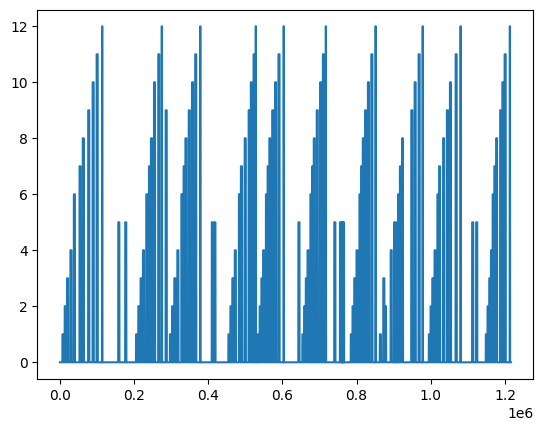

In [257]:
df['Activity'].plot()

<AxesSubplot:>

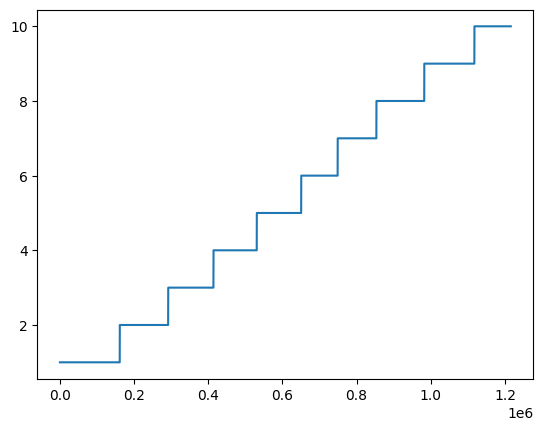

In [244]:
df['subject'].plot()

In [3]:
result = pd.DataFrame([])
for i in range(1, 11):
    with open('../Data/mHealth/mHealth_subject'+str(i)+'.pickle', 'rb') as f:
        df = pickle.load(f)
    result = pd.concat([result, df])

<AxesSubplot:>

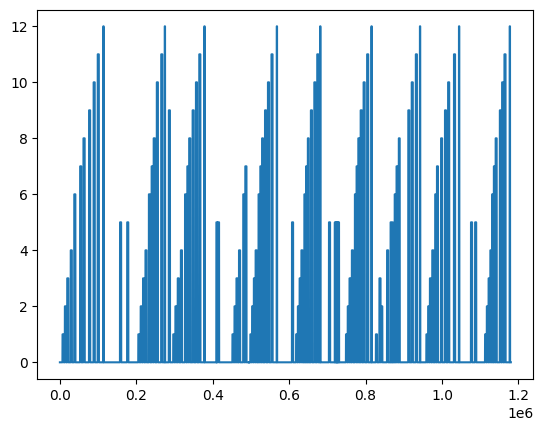

In [4]:
result = result.reset_index(drop=True)
result['label'].plot()

In [5]:
with open('../Data/mHealth/final_mHealth.pickle', 'wb') as f:
    pickle.dump(result, f)

In [214]:
df['subject'].value_counts()

subject1     161280
subject9     135168
subject2     130561
subject8     129024
subject3     122112
subject5     119808
subject4     116736
subject7     104448
subject6      98304
subject10     98304
Name: subject, dtype: int64

In [64]:
with open('../Data/mHealth/mHealth_balanced.pickle', 'rb') as f:
    df = pickle.load(f)
df = df.rename(columns = {'label':'Activity'})

In [70]:
df.iloc[:, :-1]

,xc_ACC,yc_ACC,zc_ACC,ecg1,ecg2,xla_ACC,yla_ACC,zla_ACC,xla_GYR,yla_GYR,...,zla_MAG,xrla_ACC,yrla_ACC,zrla_ACC,xrla_GYR,yrla_GYR,zrla_GYR,xrla_MAG,yrla_MAG,zrla_MAG
0,-9.4570,0.12269,2.5163,-0.062794,0.506540,-0.007531,-9.5752,0.89616,-0.47310,-0.68856,...,-0.73264,-3.46760,-9.5290,3.09650,-0.852940,-0.634500,0.24353,-8.95110,2.559700,-7.0638
1,-21.8200,-1.44610,12.6910,-0.895870,-1.728900,19.606000,-19.3380,-18.94800,0.71614,-0.62477,...,38.47000,-20.80600,-7.3736,-15.35800,-0.925490,0.022587,0.60345,157.35000,7.599900,-117.1500
2,-9.8095,0.57741,1.1362,-0.087912,-0.142330,2.581100,-9.6585,0.49080,-0.21336,-0.88931,...,-0.87726,-3.07820,-9.1534,1.65690,-0.072549,-0.940450,-0.34483,0.35892,-0.014346,-1.0757
3,-9.3517,0.41577,3.6164,-0.142330,-0.280480,2.480100,-9.5274,0.72551,-0.35807,-0.80488,...,-0.18240,0.41776,9.0539,3.39020,-0.174510,1.043100,-0.22629,-1.77400,2.133700,-6.1940
4,-9.0360,2.30680,-1.3292,-0.025118,-0.133960,-0.773570,-8.5874,-3.29130,0.50649,-0.75610,...,-20.85700,-3.79490,-7.2376,0.24229,-0.505880,-0.542090,1.09480,-15.57600,-31.531000,-10.8270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12895,-7.9340,-0.27121,-4.0455,-0.221870,0.066981,1.244100,-4.2712,-4.34700,0.41373,-0.72608,...,-11.69600,1.27740,-7.6503,5.97170,0.643140,-0.560570,1.03660,-6.23460,4.904000,-24.0000
12896,-14.4130,0.42798,1.3754,0.096285,0.196760,3.690200,-16.1100,2.90850,0.53618,-0.80863,...,17.97200,-3.87470,-10.4600,1.97700,-0.582350,-0.636550,0.74353,-4.65750,-16.919000,9.4623
12897,-17.6880,3.59160,-15.2350,-0.523290,-1.339600,-6.180000,-16.0250,-4.43590,0.50093,-0.70919,...,-35.36900,-21.12300,-3.4009,-6.08670,-0.884310,0.199180,0.59483,-8.85120,12.549000,84.5350
12898,-8.0950,-0.80391,-3.4618,0.100470,-0.062794,-1.053400,-9.1817,-4.31340,0.51577,-0.58161,...,-2.18590,-1.77450,-4.7427,4.73160,0.658820,-0.556470,1.02590,2.37700,-13.651000,-19.6720


In [202]:
with open('../Data/mHealth/mHealth_subject9.pickle', 'rb') as f:
    df = pickle.load(f)

<AxesSubplot:>

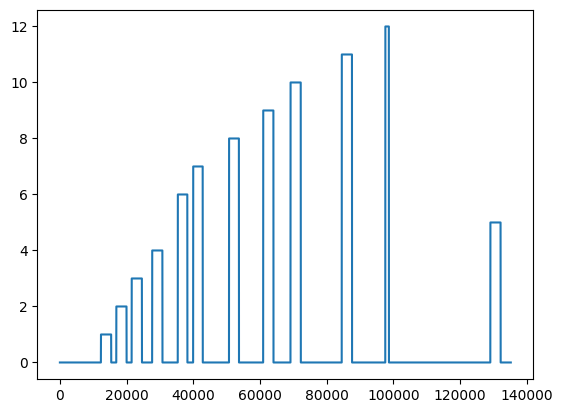

In [205]:
df['label'].plot()

In [201]:
df['subject'].value_counts()

subject1     161280
subject9     135168
subject2     130561
subject8     129024
subject3     122112
subject5     119808
subject4     116736
subject7     104448
subject6      98304
subject10     98304
Name: subject, dtype: int64

In [41]:
with open('../Data/mHealth/final_mHealth.pickle', 'rb') as f:
    df = pickle.load(f)

In [42]:
df = df.rename(columns = {'label':'Activity'})

In [44]:
df = df.drop(columns=['ecg1', 'ecg2'])

In [3]:
from sklearn.utils import resample
 
df_majority = df[df.Activity==0]
df_minorities = df[df.Activity!=0]
 
df_majority_downsampled = resample(df_majority,n_samples=30000, random_state=42)
df = pd.concat([df_majority_downsampled, df_minorities])
df.Activity.value_counts()

1     30720
2     30720
3     30720
4     30720
9     30720
10    30720
11    30720
5     30720
0     30000
7     29441
8     29337
6     28315
12    10342
Name: Activity, dtype: int64

In [46]:
df

,xc_ACC,yc_ACC,zc_ACC,xla_ACC,yla_ACC,zla_ACC,xla_GYR,yla_GYR,zla_GYR,xla_MAG,...,xrla_ACC,yrla_ACC,zrla_ACC,xrla_GYR,yrla_GYR,zrla_GYR,xrla_MAG,yrla_MAG,zrla_MAG,Activity
154060,-8.1302,-0.56142,-4.513700,-0.68636,-5.2902,4.64530,0.13544,-0.83114,-0.13163,36.53800,...,-8.42300,-6.6402,2.98050,-0.93922,0.090349,0.219830,11.42200,-24.7380,5.8910,0.0
927634,-8.9526,0.66113,3.722700,1.94360,-9.6633,0.00502,0.75139,-0.64728,-0.11984,-0.68802,...,2.78910,-9.2688,-3.88010,-0.18039,-1.112900,0.219830,5.27930,-100.4300,34.6840,0.0
167106,-9.4779,-0.85128,1.912900,1.53220,-9.5966,-0.25618,-0.27273,-0.75985,0.63654,0.00011,...,-2.58980,-8.5217,3.83430,-0.88431,-0.848050,0.331900,-0.91064,-1.2975,-3.6153,0.0
492675,-6.6171,-0.45632,-3.409500,1.57650,-9.5343,-3.92970,-0.42857,-0.59850,-0.74656,39.19200,...,-0.12426,-7.8358,1.42070,-0.52549,-0.889120,-0.161640,6.02930,-7.4787,20.4120,0.0
355024,-9.6233,-0.14608,-0.065779,-0.34940,-9.5201,1.45800,-0.68275,-0.77861,-0.24558,-0.33491,...,-1.41780,-9.5157,1.43050,-0.12353,-0.967150,-0.497840,-0.37914,-2.0069,-1.4316,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178109,-21.9470,3.92360,-6.225800,-2.48730,-19.2330,3.46140,0.61967,-0.33771,-0.82711,-18.41400,...,-8.23480,-4.9652,2.48090,-0.43725,-1.018500,0.079741,-0.21300,14.6060,8.5139,12.0
1178110,-21.9140,2.75210,-12.279000,-21.59100,-19.4370,-6.04190,0.61967,-0.33771,-0.82711,-26.84900,...,-21.31800,-10.2130,3.65600,-0.43725,-1.018500,0.079741,8.61850,36.0000,-21.1260,12.0
1178111,-21.8140,-2.72740,-12.709000,7.54330,-19.2450,-2.66800,0.61967,-0.33771,-0.82711,-30.95600,...,-21.29700,-18.7050,4.46060,-0.43725,-1.018500,0.079741,16.95300,7.6535,-34.3950,12.0
1178112,-21.7900,-3.92290,-7.279400,3.01420,-19.3340,-7.70740,0.71058,-0.27017,-0.75442,12.25600,...,-21.13800,-18.6980,1.15880,-0.42549,-1.037000,0.084052,25.37500,-29.7960,4.0546,12.0


<AxesSubplot:>

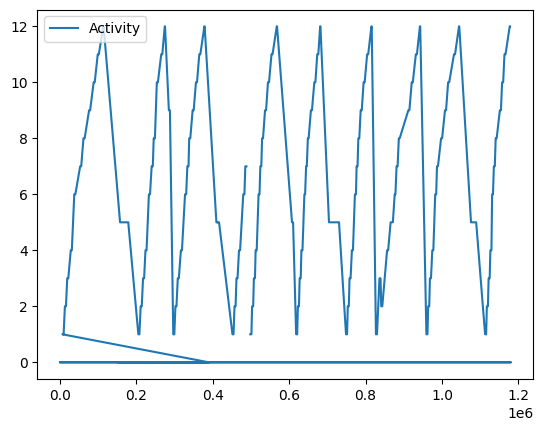

In [12]:
df[['Activity']].plot()

In [275]:
df

,xc_ACC,yc_ACC,zc_ACC,ecg1,ecg2,xla_ACC,yla_ACC,zla_ACC,xla_GYR,yla_GYR,...,xrla_ACC,yrla_ACC,zrla_ACC,xrla_GYR,yrla_GYR,zrla_GYR,xrla_MAG,yrla_MAG,zrla_MAG,Activity
154060,-8.1302,-0.56142,-4.513700,0.020931,0.004186,-0.68636,-5.2902,4.64530,0.13544,-0.83114,...,-8.42300,-6.6402,2.98050,-0.93922,0.090349,0.219830,11.42200,-24.7380,5.8910,0.0
927634,-8.9526,0.66113,3.722700,-0.096285,0.297230,1.94360,-9.6633,0.00502,0.75139,-0.64728,...,2.78910,-9.2688,-3.88010,-0.18039,-1.112900,0.219830,5.27930,-100.4300,34.6840,0.0
167106,-9.4779,-0.85128,1.912900,-0.050235,-0.058608,1.53220,-9.5966,-0.25618,-0.27273,-0.75985,...,-2.58980,-8.5217,3.83430,-0.88431,-0.848050,0.331900,-0.91064,-1.2975,-3.6153,0.0
492675,-6.6171,-0.45632,-3.409500,-0.297230,-0.175820,1.57650,-9.5343,-3.92970,-0.42857,-0.59850,...,-0.12426,-7.8358,1.42070,-0.52549,-0.889120,-0.161640,6.02930,-7.4787,20.4120,0.0
355024,-9.6233,-0.14608,-0.065779,-0.343280,-0.996340,-0.34940,-9.5201,1.45800,-0.68275,-0.77861,...,-1.41780,-9.5157,1.43050,-0.12353,-0.967150,-0.497840,-0.37914,-2.0069,-1.4316,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178109,-21.9470,3.92360,-6.225800,0.133960,0.163270,-2.48730,-19.2330,3.46140,0.61967,-0.33771,...,-8.23480,-4.9652,2.48090,-0.43725,-1.018500,0.079741,-0.21300,14.6060,8.5139,12.0
1178110,-21.9140,2.75210,-12.279000,-0.087912,-0.083726,-21.59100,-19.4370,-6.04190,0.61967,-0.33771,...,-21.31800,-10.2130,3.65600,-0.43725,-1.018500,0.079741,8.61850,36.0000,-21.1260,12.0
1178111,-21.8140,-2.72740,-12.709000,-0.309790,-0.200940,7.54330,-19.2450,-2.66800,0.61967,-0.33771,...,-21.29700,-18.7050,4.46060,-0.43725,-1.018500,0.079741,16.95300,7.6535,-34.3950,12.0
1178112,-21.7900,-3.92290,-7.279400,-0.443750,-0.259550,3.01420,-19.3340,-7.70740,0.71058,-0.27017,...,-21.13800,-18.6980,1.15880,-0.42549,-1.037000,0.084052,25.37500,-29.7960,4.0546,12.0


In [312]:
np.quantile(df['xla_GYR'], 0.3)

nan

In [301]:
df['xc_ACC']

154060     -8.1302
927634     -8.9526
167106     -9.4779
492675     -6.6171
355024     -9.6233
            ...   
1178109   -21.9470
1178110   -21.9140
1178111   -21.8140
1178112   -21.7900
1178113   -14.4510
Name: xc_ACC, Length: 358619, dtype: float64

In [4]:
#Dropping feature have data outside 98% confidence interval
df1 = df.copy()
for feature in df1.columns[:-1]:
  lower_range = np.quantile(df[feature],0.01)
  upper_range = np.quantile(df[feature],0.99)
  print(feature,'range:',lower_range,'to',upper_range)

  df1 = df1.drop(df1[(df1[feature]>upper_range) | (df1[feature]<lower_range)].index, axis=0)
  print('shape',df1.shape)

alx range: -11.47312 to 19.233
shape (365733, 14)
aly range: -19.379 to 2.447871999999997
shape (360018, 14)
alz range: -18.95 to 14.19623999999999
shape (356270, 14)
glx range: -0.74212 to 0.80705
shape (349377, 14)
gly range: -1.0694 to 0.96623
shape (342841, 14)
glz range: -1.1061 to 0.8290799999999999
shape (337391, 14)
arx range: -21.492 to 9.097647999999998
shape (332307, 14)
ary range: -18.694000000000003 to 11.948059999999998
shape (326241, 14)
arz range: -10.367 to 11.823119999999996
shape (323674, 14)
grx range: -1.0196 to 0.95686
shape (320188, 14)
gry range: -1.1417 to 0.90965
shape (315352, 14)
grz range: -0.69828 to 1.125
shape (310929, 14)
Activity range: 0.0 to 12.0
shape (310929, 14)


In [5]:
label_map = {
    0: 'Nothing',
    1: 'Standing still',  
    2: 'Sitting and relaxing', 
    3: 'Lying down',  
    4: 'Walking',  
    5: 'Climbing stairs',  
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms', 
    8: 'Knees bending (crouching)', 
    9: 'Cycling', 
    10: 'Jogging', 
    11: 'Running', 
    12: 'Jump front & back' 
}

<AxesSubplot:>

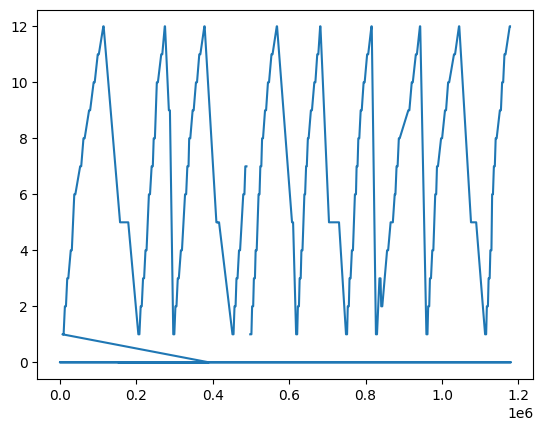

In [17]:
df['Activity'].plot()

In [48]:
df1 = df.copy()


In [49]:
df1 = df1.reset_index(drop=True)

In [50]:
train = df1.iloc[:int(0.8*len(df1))]
test = df1.iloc[int(0.8*len(df1)):]

<AxesSubplot:>

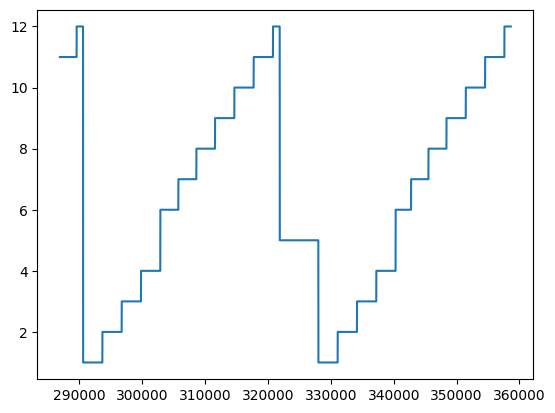

In [51]:
test['Activity'].plot()

In [21]:
df1

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
154060,-0.68636,-5.29020,4.64530,0.13544,-0.83114,-0.13163,-8.4230,-6.640200,2.98050,-0.93922,0.090349,0.219830,0,subject1
936066,1.00030,-7.79020,-6.74410,-0.26531,-0.14447,-1.09820,2.2046,-7.549700,4.02880,-0.21961,-1.080100,0.303880,0,subject8
167106,1.53220,-9.59660,-0.25618,-0.27273,-0.75985,0.63654,-2.5898,-8.521700,3.83430,-0.88431,-0.848050,0.331900,0,subject2
493889,1.78090,-8.59420,-3.97440,-0.41002,-0.55535,-0.78389,-1.0049,-6.858800,2.11540,-0.35686,-0.854210,-0.415950,0,subject4
355024,-0.34940,-9.52010,1.45800,-0.68275,-0.77861,-0.24558,-1.4178,-9.515700,1.43050,-0.12353,-0.967150,-0.497840,0,subject3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213636,-0.19979,-0.93484,2.55540,0.63080,-0.52533,-0.67976,-4.0212,-0.082645,0.73545,-0.45882,-1.000000,0.122840,12,subject10
1213637,-0.33315,-1.23710,-2.91940,0.63822,-0.42777,-0.74853,-2.2515,-0.414790,0.52093,-0.41765,-1.037000,0.088362,12,subject10
1213640,6.77570,-15.07500,7.39740,0.61967,-0.33771,-0.82711,-2.2797,-2.358900,2.11120,-0.41765,-1.037000,0.088362,12,subject10
1213641,-2.48730,-19.23300,3.46140,0.61967,-0.33771,-0.82711,-8.2348,-4.965200,2.48090,-0.43725,-1.018500,0.079741,12,subject10


In [24]:
train = df1[(df1['subject'] != 'subject10') & (df1['subject'] != 'subject9')]; train

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
154060,-0.68636,-5.2902,4.64530,0.13544,-0.83114,-0.13163,-8.42300,-6.64020,2.980500,-0.93922,0.090349,0.21983,0,subject1
936066,1.00030,-7.7902,-6.74410,-0.26531,-0.14447,-1.09820,2.20460,-7.54970,4.028800,-0.21961,-1.080100,0.30388,0,subject8
167106,1.53220,-9.5966,-0.25618,-0.27273,-0.75985,0.63654,-2.58980,-8.52170,3.834300,-0.88431,-0.848050,0.33190,0,subject2
493889,1.78090,-8.5942,-3.97440,-0.41002,-0.55535,-0.78389,-1.00490,-6.85880,2.115400,-0.35686,-0.854210,-0.41595,0,subject4
355024,-0.34940,-9.5201,1.45800,-0.68275,-0.77861,-0.24558,-1.41780,-9.51570,1.430500,-0.12353,-0.967150,-0.49784,0,subject3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978518,4.95120,-2.8483,-3.64500,-0.52876,-0.72795,-0.67387,2.90100,-1.33920,0.078873,-0.70784,0.435320,-0.68319,12,subject8
978519,5.72820,-1.1482,-6.89600,-0.48052,-0.82927,-0.59725,1.70570,-1.09490,0.507750,-0.70784,0.435320,-0.68319,12,subject8
978520,7.27720,-1.4694,-4.36530,-0.48052,-0.82927,-0.59725,0.40392,-0.44981,2.019200,-0.74118,0.363450,-0.66379,12,subject8
978523,4.22170,-18.8880,3.28530,-0.38590,-0.72233,-0.77603,-11.63600,1.79280,-2.722900,-0.72353,0.293630,-0.68750,12,subject8


In [22]:
#spliting data into train and test set
print(df1.shape)
train = df1[(df1['subject'] != 'subject10') & (df1['subject'] != 'subject9')]
test = df1.drop(train.index, axis=0)
train.shape,test.shape

(310929, 14)


((246501, 14), (64428, 14))

Int64Index([154060, 936066, 167106, 493889, 355024, 898274, 172511, 725924,
            222665, 251801,
            ...
            978513, 978514, 978515, 978516, 978517, 978518, 978519, 978520,
            978523, 978524],
           dtype='int64', length=246501)

In [27]:
X_train = train.drop(['Activity','subject'],axis=1)
y_train = train['Activity']
X_test = test.drop(['Activity', 'subject'],axis=1)
y_test = test['Activity']
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((246501, 12), (246501,), (64428, 12), (64428,))

In [28]:
from scipy import stats

#function to create time series datset for seuence modeling
def create_dataset(X, y, time_steps, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        x = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(x)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [29]:
X_train,y_train = create_dataset(X_train, y_train, 100, step=50)
X_train.shape, y_train.shape

((4929, 100, 12), (4929, 1))

In [40]:
X_test

array([[[-9.9326e-01,  5.7235e+00, -1.6217e+00, ...,  4.1019e+01,
         -9.4144e+00,  7.9615e+01],
        [ 3.7472e+00,  6.0747e+00,  2.3362e+00, ...,  1.4494e+01,
         -4.0718e+01,  1.1694e+02],
        [ 4.6027e+00,  8.2488e+00, -3.1102e+00, ..., -6.6279e+00,
         -5.2373e+01,  1.4624e+02],
        ...,
        [ 1.2851e+00,  3.8929e-01, -2.7023e-01, ...,  3.9889e+01,
          3.2362e+00, -2.8985e+02],
        [ 3.5838e+00, -4.0319e-01, -5.4155e-01, ...,  6.7501e+01,
          1.7587e+01, -3.8800e+02],
        [ 3.9149e+00, -1.8066e+00,  7.3215e-01, ...,  9.7043e+01,
          2.7509e+01, -4.9148e+02]],

       [[-2.1945e+01,  7.9508e-01,  1.5768e+00, ..., -1.1425e+02,
         -2.4468e+01,  3.9724e+02],
        [-2.2068e+01,  5.4043e+00,  7.2022e+00, ..., -1.0265e+02,
          2.1866e+01,  3.5982e+02],
        [-2.1932e+01,  1.1639e+00,  3.0942e+00, ..., -9.6544e+01,
          5.8386e+01,  3.1554e+02],
        ...,
        [-1.8956e+01, -2.2038e+00,  2.4332e+00, ...,  

In [30]:
X_test,y_test = create_dataset(X_test, y_test, 100, step=50)
X_test.shape, y_test.shape

((1287, 100, 12), (1287, 1))

In [42]:
class ConvLSTM(nn.Module):
    def __init__(self):
        super(ConvLSTM, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=100, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        # self.lstm = nn.LSTM(input_size=64, hidden_size=64, num_layers=1, batch_first=True)
        self.fc1 = nn.Linear(in_features=64, out_features=128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=128, out_features=13)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Convolutional layers
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool(x)

        # LSTM layer
        # x = x.permute(0, 2, 1)  # Change from (batch_size, seq_len, num_features) to (batch_size, num_features, seq_len)
        # x, _ = self.lstm(x)
        # x = x[:, -1, :]  # Extract the last timestep output

        # Fully connected layers
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [41]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=100, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(num_features=32)
        
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(num_features=64)
        
        self.max_pool = nn.MaxPool1d(kernel_size=2)
        
        # self.lstm = nn.LSTM(input_size=64, hidden_size=64, batch_first=True)
        
        self.fc1 = nn.Linear(in_features=64, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=13)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        
        x = self.max_pool(x)
        
        # x = x.permute(0, 2, 1) # Permute to match LSTM input shape
        # x, _ = self.lstm(x)
        # x = x[:, -1, :] # Only take the last output of the LSTM
        
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        
        return x

In [43]:
model = ConvLSTM().to(DEVICE)

In [40]:
model

ConvLSTM(
  (conv1): Conv1d(100, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (lstm): LSTM(64, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=13, bias=True)
  (softmax): Softmax(dim=1)
)

In [60]:
model

Net(
  (conv1): Conv1d(100, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (max_pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=64, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=13, bias=True)
)

In [130]:
model.state_dict().keys()

odict_keys(['conv1.weight', 'conv1.bias', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'conv2.weight', 'conv2.bias', 'bn2.weight', 'bn2.bias', 'bn2.running_mean', 'bn2.running_var', 'bn2.num_batches_tracked', 'lstm.weight_ih_l0', 'lstm.weight_hh_l0', 'lstm.bias_ih_l0', 'lstm.bias_hh_l0', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])

In [138]:
model.state_dict()['conv1.weight'].shape

torch.Size([32, 100, 3])

In [137]:
model.state_dict()['conv2.weight'].shape

torch.Size([64, 32, 3])

In [142]:
model.state_dict()['fc2.weight'].shape

torch.Size([13, 128])

In [33]:
X_train

array([[[ -0.68636 ,  -5.2902  ,   4.6453  , ...,  -0.93922 ,
           0.090349,   0.21983 ],
        [  1.0003  ,  -7.7902  ,  -6.7441  , ...,  -0.21961 ,
          -1.0801  ,   0.30388 ],
        [  1.5322  ,  -9.5966  ,  -0.25618 , ...,  -0.88431 ,
          -0.84805 ,   0.3319  ],
        ...,
        [  3.6543  ,  -9.0272  ,  -0.73773 , ...,  -0.090196,
          -0.87269 ,  -0.67026 ],
        [  0.90865 ,  -9.5871  ,   1.686   , ...,  -0.68824 ,
          -0.82752 ,   0.090517],
        [  0.34651 ,  -7.6891  ,  -0.58932 , ...,  -0.17647 ,
          -1.0267  ,  -0.3944  ]],

       [[  0.83059 ,  -5.2852  ,  -0.79762 , ...,  -0.18627 ,
          -0.76797 ,   0.89224 ],
        [  2.0891  ,  -9.5404  ,   1.4085  , ...,  -0.18627 ,
           0.030801,   1.1228  ],
        [  0.35037 ,  -8.0943  ,   2.453   , ...,  -0.74902 ,
           0.23819 ,   0.51724 ],
        ...,
        [-11.356   ,  -8.9798  ,  -8.8751  , ...,  -0.38235 ,
          -0.6037  ,  -0.58405 ],
        [  1

In [34]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

X_train1 = torch.from_numpy(X_train).float().to(DEVICE)
y_train1 = torch.from_numpy(y_train).long().to(DEVICE)

X_test1 = torch.from_numpy(X_test).float().to(DEVICE)
y_test1 = torch.from_numpy(y_test).long().to(DEVICE)

X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

(torch.Size([4929, 100, 12]),
 torch.Size([4929, 1]),
 torch.Size([1287, 100, 12]),
 torch.Size([1287, 1]))

In [37]:
y_train1[:10]

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]], device='cuda:0')

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
def train(model, X_train, y_train, X_test, y_test, optimizer, loss_fn, epochs=10):
    train_acc = []
    test_acc = []
    train_loss =[]
    test_loss = []
    for epoch in tqdm(range(epochs)):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train.squeeze())
        loss.backward()
        optimizer.step()
        model.eval()
        with torch.no_grad():
            y_pred_train = model(X_train)
            y_pred_test = model(X_test)
            train_acc.append(accuracy_score(y_train.cpu(), y_pred_train.cpu().argmax(1)))
            test_acc.append(accuracy_score(y_test.cpu(), y_pred_test.cpu().argmax(1)))
            train_loss.append(loss.item())
            print('Epoch: {} Train Loss: {:.4f} Train Acc: {:.4f} Test Acc: {:.4f}'.format(epoch, loss.item(), train_acc[-1], test_acc[-1]))
    return train_acc, test_acc, train_loss


train_acc, test_acc, train_loss = train(model, X_train1, y_train1, X_test1, y_test1, optimizer, loss_fn, epochs=100)

plt.plot(train_acc, label='train', color = 'b')

plt.plot(test_acc, label='test', color = 'r')

# plt.plot(train_loss, label = 'train_loss', color = 'yellow')

plt.legend()

plt.show()



  0%|          | 0/100 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (315456x6 and 64x128)

6.0     1075
11.0    1075
1.0     1075
7.0     1075
5.0     1075
12.0    1075
3.0     1075
4.0     1075
2.0     1075
9.0     1075
8.0     1075
10.0    1075
Name: label, dtype: int64